In [10]:

import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load the data
filename = 'data/VAC1 - V6 - delta V(p_H).csv'
p_H, n_SP, delta_t = np.loadtxt(
    fname=filename,
    delimiter=',',
    unpack=True,
    skiprows=1
)

# Define the volume of one scale part [l] TODO
V_SP = 1e-3 / 8

# Convert the scale parts to volumes
delta_V = n_SP * V_SP

# Define the minimal high vacuum and ambient air pressure [mbar]
p_H0 = 1e-7
p_L = 1015

In [13]:
# Calculate the 'Saugvermögen'
S = delta_V / delta_t * (p_L + 530) / (p_H - p_H0)

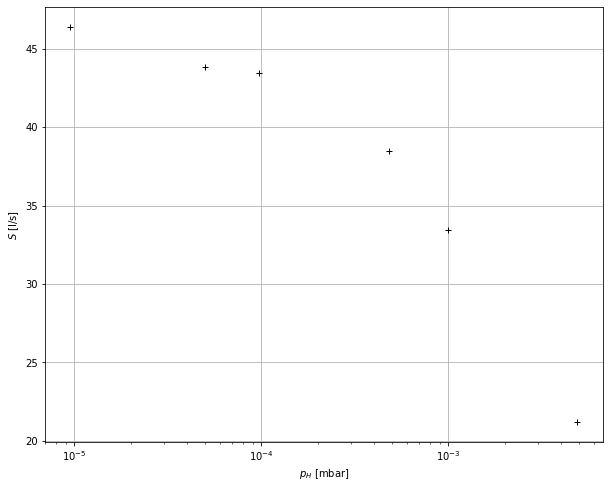

In [14]:
# Plot the resulting data
# Plot the data
fig, ax = plt.subplots(figsize=[10,8])
ax.grid()
ax.set_xscale('log')
ax.set_xlabel('$p_H$ [mbar]')
ax.set_ylabel('$S$ [l/s]')

# Plot measurement data
ax.plot(p_H, S, 'k+')

fig.savefig('figs/aufgabe4.pdf', bbox_inches='tight')